In [1]:
import yfinance as yf
import pandas as pf
import matplotlib.pyplot as plt

import sklearn.metrics as mt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR

<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp;</p>

In [2]:
data = yf.download('MSFT', start='2024-01-01', end='2024-03-01')
data.head(3)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,373.859985,375.899994,366.769989,370.869995,368.854095,25258600
2024-01-03,369.010010,373.260010,368.510010,370.600006,368.585571,23083500
2024-01-04,370.670013,373.100006,367.170013,367.940002,365.940002,20901500


In [3]:
data['Day'] = data.index.dayofyear
data.reset_index(inplace=True)
data.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,Day
0,2024-01-02,373.859985,375.899994,366.769989,370.869995,368.854095,25258600,2
1,2024-01-03,369.010010,373.260010,368.510010,370.600006,368.585571,23083500,3
2,2024-01-04,370.670013,373.100006,367.170013,367.940002,365.940002,20901500,4


<p style="background-image: linear-gradient(#0aa98f, #FFFFFF 10%)"> &nbsp; </p>

In [4]:
y = data[['Adj Close']]
X = data[['Day']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # shuffle=False,
X_train.sort_index(inplace=True)
X_test.sort_index(inplace=True)
y_train.sort_index(inplace=True)
y_test.sort_index(inplace=True)


scaler = StandardScaler()

ss_X_train = scaler.fit_transform(X_train)
ss_X_test = scaler.transform(X_test)

ss_y_train = scaler.fit_transform(y_train).ravel()
ss_y_test = scaler.transform(y_test).ravel()

<p style="background-image: linear-gradient(#0aa98f, #FFFFFF 10%)"> &nbsp; </p>

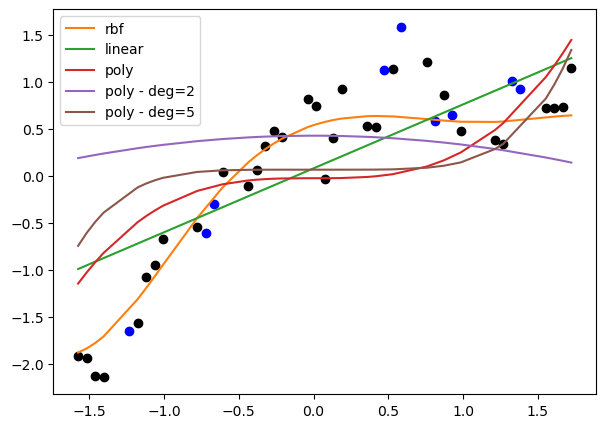

In [5]:
svm_rbf = SVR(kernel='rbf')
svm_rbf.fit(ss_X_train, ss_y_train)
predictions_rbf = svm_rbf.predict(ss_X_train)  # !WRONG! just to visualize

svm_lm = SVR(kernel='linear')
svm_lm.fit(ss_X_train, ss_y_train)
predictions_lm = svm_lm.predict(ss_X_train)

svm_pm = SVR(kernel='poly')
svm_pm.fit(ss_X_train, ss_y_train)
predictions_pm = svm_pm.predict(ss_X_train)

svm_pm2 = SVR(kernel='poly', degree=2)
svm_pm2.fit(ss_X_train, ss_y_train)
predictions_pm2 = svm_pm2.predict(ss_X_train)

svm_pm5 = SVR(kernel='poly', degree=5)
svm_pm5.fit(ss_X_train, ss_y_train)
predictions_pm5 = svm_pm5.predict(ss_X_train)


plt.scatter(ss_X_train, ss_y_train, color='black')
plt.scatter(ss_X_test, ss_y_test, color='blue')
plt.plot(ss_X_train, predictions_rbf, color='C1', label='rbf')
plt.plot(ss_X_train, predictions_lm,  color='C2', label='linear')
plt.plot(ss_X_train, predictions_pm,  color='C3', label='poly')
plt.plot(ss_X_train, predictions_pm2, color='C4', label='poly - deg=2')
plt.plot(ss_X_train, predictions_pm5, color='C5', label='poly - deg=5')

plt.gcf().set_size_inches(7,5)
plt.legend(loc='best')
plt.show()

<p style="background-image: linear-gradient(#0aa98f, #FFFFFF 10%)"> &nbsp; </p>

	rbf c=1
R2   0.8104900039479688 
RMSE 0.4194587069206605
	rbf c=1000
R2   0.7907880555101314 
RMSE 0.4407236847793178


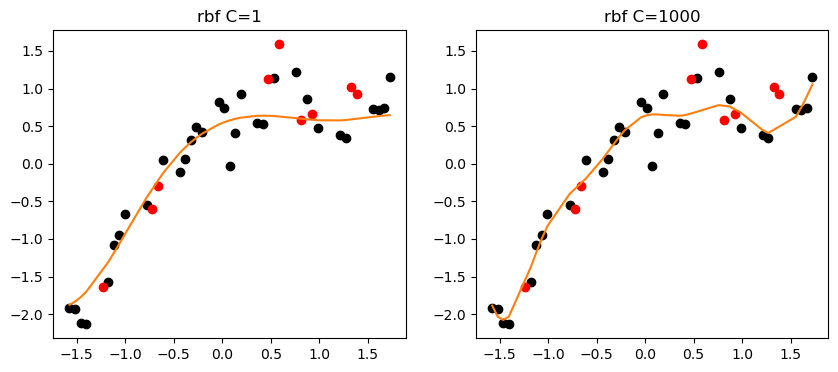

In [6]:
svm_rbf = SVR(kernel='rbf')
svm_rbf.fit(ss_X_train, ss_y_train)

_predictions_rbf = svm_rbf.predict(ss_X_train)      # !WRONG! just to visualize

predictions_rbf = svm_rbf.predict(ss_X_test)
r2_rbf = mt.r2_score(ss_y_test, predictions_rbf)
rmse_rbf = mt.root_mean_squared_error(ss_y_test, predictions_rbf)
print('\trbf c=1\nR2  ', r2_rbf, '\nRMSE', rmse_rbf)



svm_rbf_C = SVR(kernel='rbf', C=1000)
svm_rbf_C.fit(ss_X_train, ss_y_train)

_predictions_rbf_C = svm_rbf_C.predict(ss_X_train)

predictions_rbf_C = svm_rbf_C.predict(ss_X_test)
r2_rbf_C = mt.r2_score(ss_y_test, predictions_rbf_C)
rmse_rbf_C = mt.root_mean_squared_error(ss_y_test, predictions_rbf_C)
print('\trbf c=1000\nR2  ', r2_rbf_C, '\nRMSE', rmse_rbf_C)



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
                              
ax1.scatter(ss_X_train, ss_y_train, color='black')
ax1.scatter(ss_X_test, ss_y_test, color='red')
ax1.plot(ss_X_train, _predictions_rbf, color='C1')
ax1.set_title('rbf C=1')

ax2.scatter(ss_X_train, ss_y_train, color='black')
ax2.scatter(ss_X_test, ss_y_test, color='red')
ax2.plot(ss_X_train, _predictions_rbf_C, color='C1')
ax2.set_title('rbf C=1000')
                              
plt.show()

<p style="background-image: linear-gradient(#0aa98f, #FFFFFF 10%)"> &nbsp; </p>

In [7]:
params = {
    'C': [1, 10, 100, 1000, 10000],
    'gamma': [1, 0.1, 0.001],
    'kernel': ['rbf', 'linear', 'poly']
}
tuning = GridSearchCV(estimator=SVR(), param_grid=params, cv=10, n_jobs=-1)
tuning.fit(ss_X_train, ss_y_train)

print(tuning.best_params_)
print(tuning.best_score_)
print(tuning.best_estimator_)

{'C': 10000, 'gamma': 0.1, 'kernel': 'rbf'}
-0.9242107181852596
SVR(C=10000, gamma=0.1)


	rbf c=10000
R2   0.7907880555101314 
RMSE 0.4407236847793178


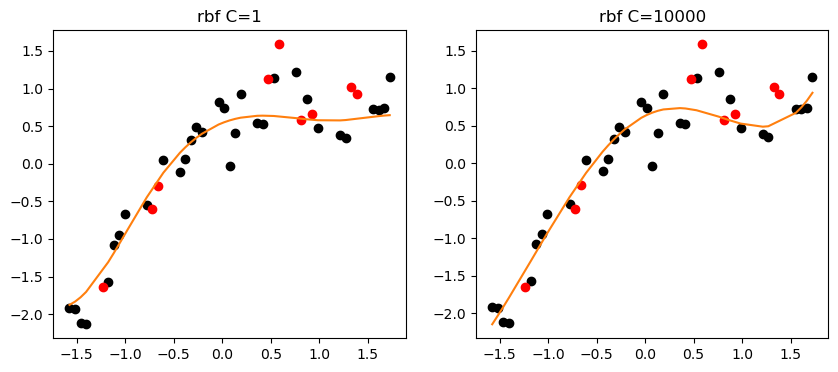

In [8]:
svm_rbf_BEST = tuning.best_estimator_
# svm_rbf_BEST = SVR(kernel='rbf', C=10000, gamma=0.1)
svm_rbf_BEST.fit(ss_X_train, ss_y_train)

_predictions_rbf_BEST = svm_rbf_BEST.predict(ss_X_train)      # !WRONG! just to visualize

predictions_rbf_BEST = svm_rbf_C.predict(ss_X_test)
r2_rbf_BEST = mt.r2_score(ss_y_test, predictions_rbf_BEST)
rmse_rbf_BEST = mt.root_mean_squared_error(ss_y_test, predictions_rbf_BEST)
print('\trbf c=10000\nR2  ', r2_rbf_BEST, '\nRMSE', rmse_rbf_BEST)



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

# Axis 1 is same with before
ax1.scatter(ss_X_train, ss_y_train, color='black')
ax1.scatter(ss_X_test, ss_y_test, color='red')
ax1.plot(ss_X_train, _predictions_rbf, color='C1')
ax1.set_title('rbf C=1')

ax2.scatter(ss_X_train, ss_y_train, color='black')
ax2.scatter(ss_X_test, ss_y_test, color='red')
ax2.plot(ss_X_train, _predictions_rbf_BEST, color='C1')
ax2.set_title('rbf C=10000')
                              
plt.show()

<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp;</p>